## 2.1 打造第一個神經網路

### 使用NN建立手寫辨識應用
    1. 問問題：想用電腦辨識手寫數字
    2. 化成函數形式：
        * 784維向量(28*28矩陣)輸出成10維向量(0~9)。
   ![化成函數](2_1_1.jpg) 
        * One-Hot encoding：依分類形成0、1組成的向量，表示不同數字。
   ![one-hot](2_1_2.jpg) 
        * 要求輸出值相加為一=>可以使用Soft Max
   ![soft max](2_1.jpg)   


## 2.2 建構神經網路

    3. 準備訓練資料
        * MNIST資料為美國研究院所提供的手寫資料庫，具有手寫訓練資料與測試資料。
    
    4. 架構神經網路
    28*28維輸入-兩層隱藏層-10維輸出
    
    5. 學習
        * SGD(Stochastic Gradient Descent)為最常見的梯度下降法。
    

## (1)初始準備
因為keras可以選擇多種backend，因此需要先設定我們環境使用tensorflow

In [3]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## (2.1) 由Keras讀入MNIST

In [5]:
from keras.datasets import mnist

Using TensorFlow backend.


In [6]:
(x_train, y_train),(x_test,y_test)=mnist.load_data()

In [7]:
len(x_train)

60000

In [8]:
x_train[9487]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

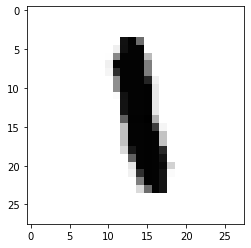

In [9]:
plt.imshow(x_train[9487],  cmap='Greys')

看實際資料答案

In [10]:
y_train[9487]

1

## (2.2)輸入資料整理

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

## (2.3) 輸出資料整理
使用1-hot encoding

In [13]:
from keras.utils import np_utils

In [14]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [15]:
y_train[9487]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## (3.1) 決定神經網路架構、讀入套件

範例：
- 使用兩個隱藏層
- 每個隱藏層具有500個神經元
- Activation Function 指定為sigmoid

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

## (3.2)建構神經網路

In [17]:
model = Sequential()

* 第一層隱藏層
    - Dense表示為fullly connected，並內含500個神經元
    - 輸入資料維度為784
    - 指定激活函數為sigmoid

In [18]:
model.add(Dense(500, input_dim=784))
model.add(Activation('sigmoid'))

* 第二層隱藏層

In [19]:
model.add(Dense(500))
model.add(Activation('sigmoid'))

* 輸出層
    - 10維輸出
    - 使用soft max當激活函數(相加為1)

In [20]:
model.add(Dense(10))
model.add(Activation('softmax'))

## (3.3)組裝神經網路

- 設定loss function為mse(誤差平方和平均)
- 設定學習法為SGD，且學習速率為0.1
- 並在訓練過程看見正確率

In [21]:
model.compile(loss='mse',optimizer=SGD(lr=0.1),
             metrics=['accuracy'])

## 4 檢視神經網路

## (4.1)model summary

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
________________________________________________

In [23]:
# 第一層：392500(784維對應各自500的權重+500個神經元各有一個偏值)
784*500+500

392500

In [24]:
# 第二層：250500(500個神經元對上下一個500個神經元+500個偏值)
500*500+500

250500

In [25]:
# 第三層：5010(500個神經元*10維+10個偏值)
500*10+10

5010

## (4.2)化出結構圖
需要在終端機額外安裝兩個套件pydot、graphviz
    - conda install pydot
    - conda install graphviz

## (5)訓練第一個神經網路
    - batch_size表示一次訓練多少筆
    - epochs表示6萬筆要訓練幾次

In [26]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 16s 267us/step - loss: 0.0833 - accuracy: 0.3346
Epoch 2/20
60000/60000 [==============================] - 17s 278us/step - loss: 0.0634 - accuracy: 0.5875
Epoch 3/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.0463 - accuracy: 0.7481
Epoch 4/20
60000/60000 [==============================] - 20s 333us/step - loss: 0.0343 - accuracy: 0.8241
Epoch 5/20
60000/60000 [==============================] - 18s 293us/step - loss: 0.0267 - accuracy: 0.8684
Epoch 6/20
60000/60000 [==============================] - 17s 276us/step - loss: 0.0221 - accuracy: 0.8856s - loss: - ETA: 0s - loss: 0.0221 - accu
Epoch 7/20
60000/60000 [==============================] - 13s 214us/step - loss: 0.0192 - accuracy: 0.8961s - loss: 0.0192 - accura
Epoch 8/20
60000/60000 [==============================] - 13s 224us/step - loss: 0.0172 - accuracy: 0.9037
Epoch 9/20
60000/60000 [==============================] - 11s 182us/step - los

## (6) 試用我們的結果

In [27]:
from ipywidgets import interact_manual

predict_classes會讓keras選出十個機率最大的那類。

In [28]:
predict = model.predict_classes(x_test)

In [29]:
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap="Greys")
    print("神經網路判斷為:", predict[測試編號])

In [30]:
interact_manual(test, 測試編號=(0,9999))

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …

<function __main__.test(測試編號)>

## (7)將訓練好的神經網路存起來
需要另安裝別的套件，將神經網路架構與參數儲存起來。
- conda install h5py

In [31]:
model_json= model.to_json()
open('handwriting_model_architecture.json', 'w').write(model_json)
model.save_weights('handwriting_model_weights.h5')